In [129]:
import pandas as pd
import missingno as msno
import re
from dateutil.parser import parse # to help with datatime edits
import numpy as np

# Import data from 'card_details.csv' into DataFrame.
table_name = 'card_details'
csv_file_path = 'card_details.csv'
card_details_df = pd.read_csv(csv_file_path)
# Display the DataFrame
display(card_details_df)


,card_number,expiry_date,card_provider,date_payment_confirmed
0,30060773296197,09/26,Diners Club / Carte Blanche,2015-11-25
1,349624180933183,10/23,American Express,2001-06-18
2,3529023891650490,06/23,JCB 16 digit,2000-12-26
3,213142929492281,09/27,JCB 15 digit,2011-02-12
4,502067329974,10/25,Maestro,1997-03-13
...,...,...,...,...
15304,180036921556789,12/28,JCB 15 digit,1997-06-06
15305,180018030448512,11/24,JCB 15 digit,2004-06-16
15306,3569953313547220,04/24,JCB 16 digit,2020-02-05
15307,4444521712606810,06/27,VISA 16 digit,2008-06-16


In [130]:
card_details_original = card_details_df.copy()


In [131]:
display(card_details_df.info())
display(card_details_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15309 entries, 0 to 15308
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   card_number             15298 non-null  object
 1   expiry_date             15298 non-null  object
 2   card_provider           15298 non-null  object
 3   date_payment_confirmed  15298 non-null  object
dtypes: object(4)
memory usage: 478.5+ KB


None

,card_number,expiry_date,card_provider,date_payment_confirmed
count,15298,15298,15298,15298
unique,15298,135,24,8269
top,30060773296197,12/29,VISA 16 digit,1998-02-25
freq,1,163,2426,8


# Run test block

In [132]:
# Remove rows where "card_number" is null
# card_details_df_filtered = card_details_df.dropna(subset=['card_number'])
card_details_df_filtered = card_details_df.dropna(how='all')

# Convert 'expiry_date' to datetime format
card_details_df_filtered['expiry_date'] = pd.to_datetime(card_details_df_filtered['expiry_date'], format='%m/%y', errors='coerce')

# Format 'expiry_date' for display (month/year)
card_details_df_filtered['expiry_date'] = card_details_df_filtered['expiry_date'].dt.strftime('%m/%y')


# Remove rows where "expiry_date" is null
card_details_df_filtered = card_details_df_filtered.dropna(subset=['expiry_date'])


# Convert 'date_payment_confirmed' to datetime format
card_details_df_filtered['date_payment_confirmed'] = card_details_df_filtered['date_payment_confirmed'].apply(parse)
card_details_df_filtered['date_payment_confirmed'] = pd.to_datetime(card_details_df_filtered['date_payment_confirmed'], format='%y-%m-%d', errors='coerce')

# Convert 'card_provider' to datatype 'category'
card_details_df_filtered['card_provider'] = card_details_df_filtered['card_provider'].astype('category')


# Remove '?' from 'card_number' column
card_details_df_filtered['card_number'] = card_details_df_filtered['card_number'].astype('str').apply(lambda x: x.replace("?", ''))
card_details_df_filtered['card_number'] = card_details_df_filtered['card_number'].astype('string')

display(card_details_df_filtered)

display(card_details_df_filtered.isnull().sum())

# Check for the presence of '?' in 'card_number' column
count_with_question_mark = card_details_df_filtered['card_number'].str.contains('\?')

# Count the number of True values (entries with '?')
count_with_question_mark = len(card_details_df_filtered[count_with_question_mark])

# Display the count
print("Number of entries with '?':", count_with_question_mark, "\n")

card_details_df_filtered.info()

C:\Users\chemi\AppData\Local\Temp\ipykernel_15408\2147815981.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_details_df_filtered['expiry_date'] = pd.to_datetime(card_details_df_filtered['expiry_date'], format='%m/%y', errors='coerce')
C:\Users\chemi\AppData\Local\Temp\ipykernel_15408\2147815981.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_details_df_filtered['expiry_date'] = card_details_df_filtered['expiry_date'].dt.strftime('%m/%y')


,card_number,expiry_date,card_provider,date_payment_confirmed
0,30060773296197,09/26,Diners Club / Carte Blanche,2015-11-25
1,349624180933183,10/23,American Express,2001-06-18
2,3529023891650490,06/23,JCB 16 digit,2000-12-26
3,213142929492281,09/27,JCB 15 digit,2011-02-12
4,502067329974,10/25,Maestro,1997-03-13
...,...,...,...,...
15304,180036921556789,12/28,JCB 15 digit,1997-06-06
15305,180018030448512,11/24,JCB 15 digit,2004-06-16
15306,3569953313547220,04/24,JCB 16 digit,2020-02-05
15307,4444521712606810,06/27,VISA 16 digit,2008-06-16


card_number               0
expiry_date               0
card_provider             0
date_payment_confirmed    0
dtype: int64

Number of entries with '?': 0 

<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15308
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   card_number             15284 non-null  string        
 1   expiry_date             15284 non-null  object        
 2   card_provider           15284 non-null  category      
 3   date_payment_confirmed  15284 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), object(1), string(1)
memory usage: 492.9+ KB


# Run test block

In [133]:
# # Remove rows where "card_number" is null
# card_details_df_filtered = card_details_df.dropna(subset=['card_number'])

# # Convert 'expiry_date' to datetime format
# card_details_df_filtered['expiry_date'] = pd.to_datetime(card_details_df_filtered['expiry_date'], format='%m/%y', errors='coerce')

# # Remove rows where "expiry_date" is null
# card_details_df_filtered = card_details_df_filtered.dropna(subset=['expiry_date'])

# # Convert 'date_payment_confirmed' to datetime format
# card_details_df_filtered['date_payment_confirmed'] = card_details_df_filtered['date_payment_confirmed'].apply(parse)
# card_details_df_filtered['date_payment_confirmed'] = pd.to_datetime(card_details_df_filtered['date_payment_confirmed'], format='%y-%m-%d', errors='coerce')

# card_details_df_filtered['card_provider'] = card_details_df_filtered['card_provider'].astype('category')

# display(card_details_df_filtered.info())

# Run the block below to test the cleanining method

In [134]:
# # Show the rows where "card_number" isnull
# nulls_in_card_number = card_details_df["card_number"].isnull()
# card_details_df_filtered = card_details_df[~nulls_in_card_number]
# display(card_details_df_filtered.info())

# # Remove '?' from 'card_number' column
# card_details_df_filtered['card_number'] = card_details_df_filtered['card_number'].str.replace('?', '')
# display(card_details_df_filtered.info())

# # Check for entries that match a numeric pattern
# card_details_df_filtered = card_details_df_filtered[card_details_df_filtered['card_number'].str.isnumeric()]
# display(card_details_df_filtered.info())

# card_details_df_filtered['card_number'] = card_details_df_filtered['card_number'].astype('string')
# display(card_details_df_filtered.info())

# # Convert 'expiry_date' to datetime format
# card_details_df_filtered['expiry_date'] = pd.to_datetime(card_details_df_filtered['expiry_date'], format='%m/%y', errors='coerce')
# display(card_details_df_filtered.info())

# # Convert 'date_payment_confirmed' to datetime format
# card_details_df_filtered['date_payment_confirmed'] = card_details_df_filtered['date_payment_confirmed'].apply(parse)
# display(card_details_df_filtered.info())

# card_details_df_filtered['date_payment_confirmed'] = pd.to_datetime(card_details_df_filtered['date_payment_confirmed'], format='%y-%m-%d', errors='coerce')
# display(card_details_df_filtered.info())

# card_details_df_filtered['card_provider'] = card_details_df_filtered['card_provider'].astype('category')
# display(card_details_df_filtered.info())
# display(card_details_df_filtered)

# Check and drop NULL rows from df

In [135]:
# # Show the rows where "card_number" isnull
# print("Show the rows where \"card_number\" isnull:\n")
# nulls_in_card_number = card_details_df["card_number"].isnull()
# card_details_df_isnull = card_details_df[nulls_in_card_number]
# display(card_details_df_isnull)
# print("The table abovw shows rows with no data - this will need to be removed.\n")

# # Display information about the DataFrame
# print("card_details_df_isnull.info().\n")
# display(card_details_df_isnull.info())

In [136]:
# # Remove rows where "card_number" is null
# print("Removing rows where \"card_number\" is null:\n")
# card_details_df_filtered = card_details_df.dropna(how='all')

# # Display information about the cleaned DataFrame
# print("card_details_df_filtered.info().\n")
# display(card_details_df_filtered.info())


In [137]:
# print("Show df excluding the NUlls found in card_number:\n")
# card_details_df_filtered = card_details_df[~nulls_in_card_number]
# card_details_df_filtered

In [138]:
# card_details_df_filtered.info()

# Visual check for missing data

<Axes: >

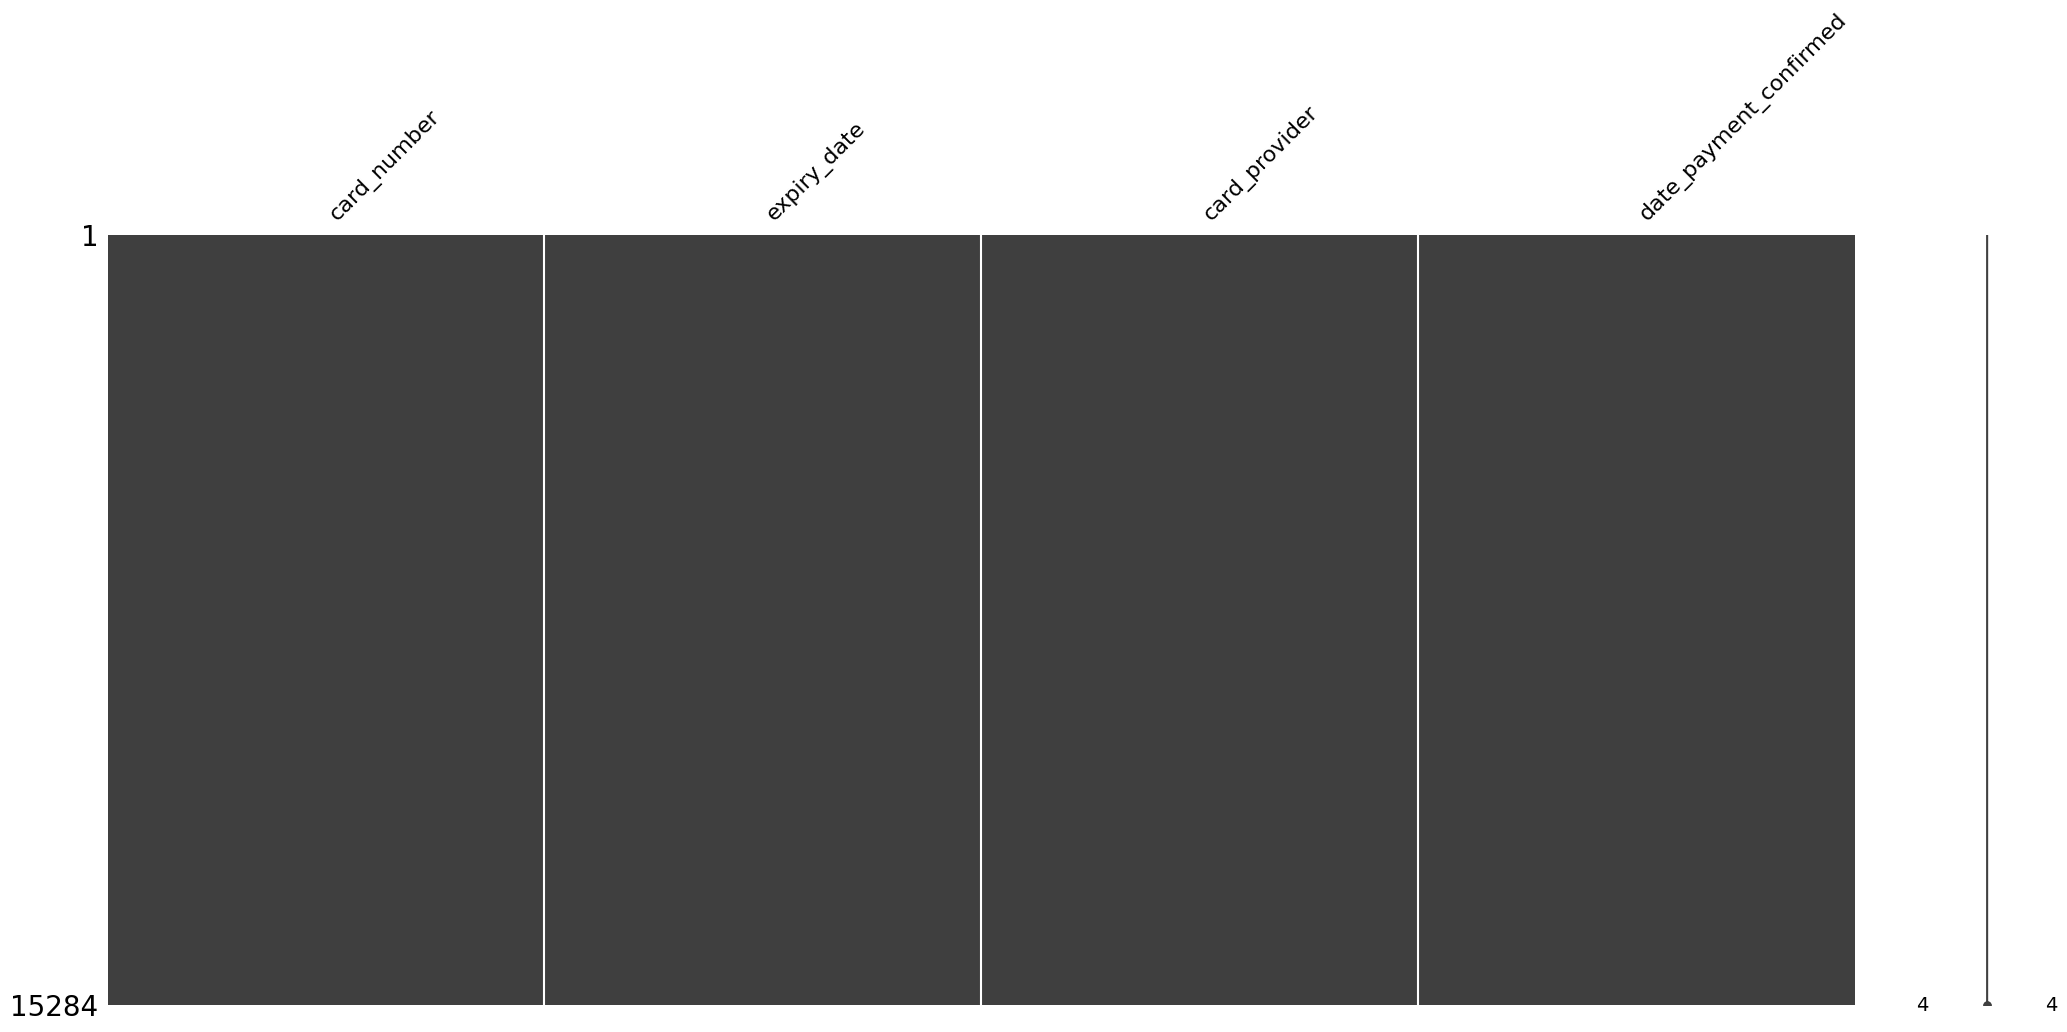

In [139]:
# Visualising Missing Data
import missingno as msno

msno.matrix(card_details_df_filtered)

In [140]:
card_details_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15308
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   card_number             15284 non-null  string        
 1   expiry_date             15284 non-null  object        
 2   card_provider           15284 non-null  category      
 3   date_payment_confirmed  15284 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), object(1), string(1)
memory usage: 492.9+ KB


# Checking of card_number column

In [141]:
# # Check for entries that do not match a numeric pattern
# non_numeric_entries = card_details_df_filtered[~card_details_df_filtered['card_number'].str.isnumeric()]

# # Display the results
# print("Entries with non-numeric characters:")
# display(non_numeric_entries)
# display(non_numeric_entries.info())
# display(non_numeric_entries.describe())


In [142]:
# Check for the presence of '?' in 'card_number' column
count_with_question_mark = card_details_df_filtered['card_number'].str.contains('\?')

# Count the number of True values (entries with '?')
count_with_question_mark = len(card_details_df_filtered[count_with_question_mark])

# Display the count
print("Number of entries with '?':", count_with_question_mark, "\n")

# Remove '?' from 'card_number' column
card_details_df_filtered['card_number'] = card_details_df_filtered['card_number'].str.replace('?', '')
print("'?' replaced in card_number column.\n")

# # Check for entries that do not match a numeric pattern
# non_numeric_entries = card_details_df_filtered[~card_details_df_filtered['card_number'].str.isnumeric()]

# # Display the results
# print("Entries with non-numeric pattern in card_number column to exclude from df:\n")
# display(non_numeric_entries)
# display(non_numeric_entries.info())
# display(non_numeric_entries.describe())

# # Check for entries that do match a numeric pattern
# print("Entries with numeric characters:\n")
# card_details_df_filtered = card_details_df_filtered[card_details_df_filtered['card_number'].str.isnumeric()]
card_details_df_filtered['card_number'] = card_details_df_filtered['card_number'].astype('string')
display(card_details_df_filtered)
display(card_details_df_filtered.info())

Number of entries with '?': 0 

'?' replaced in card_number column.



,card_number,expiry_date,card_provider,date_payment_confirmed
0,30060773296197,09/26,Diners Club / Carte Blanche,2015-11-25
1,349624180933183,10/23,American Express,2001-06-18
2,3529023891650490,06/23,JCB 16 digit,2000-12-26
3,213142929492281,09/27,JCB 15 digit,2011-02-12
4,502067329974,10/25,Maestro,1997-03-13
...,...,...,...,...
15304,180036921556789,12/28,JCB 15 digit,1997-06-06
15305,180018030448512,11/24,JCB 15 digit,2004-06-16
15306,3569953313547220,04/24,JCB 16 digit,2020-02-05
15307,4444521712606810,06/27,VISA 16 digit,2008-06-16


<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15308
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   card_number             15284 non-null  string        
 1   expiry_date             15284 non-null  object        
 2   card_provider           15284 non-null  category      
 3   date_payment_confirmed  15284 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), object(1), string(1)
memory usage: 492.9+ KB


None

# Check expiry_date column

In [143]:
card_details_df_filtered['expiry_date'].unique()

array(['09/26', '10/23', '06/23', '09/27', '10/25', '11/23', '07/27',
       '02/29', '02/24', '07/23', '10/28', '11/27', '11/31', '10/29',
       '01/29', '01/26', '02/32', '10/26', '08/28', '09/32', '05/30',
       '02/23', '06/28', '07/24', '07/31', '10/30', '03/32', '12/30',
       '10/31', '12/25', '06/24', '04/32', '05/28', '08/23', '08/27',
       '08/26', '03/29', '06/25', '07/30', '01/24', '06/31', '03/24',
       '02/25', '01/23', '02/30', '03/27', '07/26', '09/25', '07/28',
       '03/28', '08/24', '06/29', '06/30', '04/23', '12/29', '03/23',
       '05/27', '04/28', '05/26', '07/32', '10/24', '01/32', '11/26',
       '02/28', '08/25', '02/31', '12/22', '07/29', '07/25', '05/31',
       '04/24', '05/25', '06/32', '05/32', '12/27', '09/31', '01/31',
       '11/25', '12/28', '10/27', '03/26', '03/31', '04/31', '08/29',
       '01/28', '09/30', '04/27', '04/29', '08/30', '12/23', '11/29',
       '09/23', '09/29', '09/28', '01/27', '05/24', '08/31', '03/25',
       '11/24', '04/

In [144]:
card_details_df_filtered['expiry_date'].isnull().sum()

0

In [145]:
# Convert 'expiry_date' to datetime format
card_details_df_filtered['expiry_date'] = pd.to_datetime(card_details_df_filtered['expiry_date'], format='%m/%y', errors='coerce')

# Format 'expiry_date' for display (month/year)
card_details_df_filtered['expiry_date'] = card_details_df_filtered['expiry_date'].dt.strftime('%m/%y').astype('string')

# Display the updated DataFrame information
display(card_details_df_filtered.info())
display(card_details_df_filtered)


# card_details_df_filtered['expiry_date'].apply(pd.to_datetime, errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15308
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   card_number             15284 non-null  string        
 1   expiry_date             15284 non-null  string        
 2   card_provider           15284 non-null  category      
 3   date_payment_confirmed  15284 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), string(2)
memory usage: 492.9 KB


None

,card_number,expiry_date,card_provider,date_payment_confirmed
0,30060773296197,09/26,Diners Club / Carte Blanche,2015-11-25
1,349624180933183,10/23,American Express,2001-06-18
2,3529023891650490,06/23,JCB 16 digit,2000-12-26
3,213142929492281,09/27,JCB 15 digit,2011-02-12
4,502067329974,10/25,Maestro,1997-03-13
...,...,...,...,...
15304,180036921556789,12/28,JCB 15 digit,1997-06-06
15305,180018030448512,11/24,JCB 15 digit,2004-06-16
15306,3569953313547220,04/24,JCB 16 digit,2020-02-05
15307,4444521712606810,06/27,VISA 16 digit,2008-06-16


In [146]:
card_details_df_filtered['expiry_date'].unique()

<StringArray>
['09/26', '10/23', '06/23', '09/27', '10/25', '11/23', '07/27', '02/29',
 '02/24', '07/23',
 ...
 '06/27', '02/26', '11/32', '05/23', '05/29', '11/22', '06/26', '11/28',
 '12/24', '01/25']
Length: 121, dtype: string

In [147]:
card_details_df_filtered.isnull().sum()

card_number               0
expiry_date               0
card_provider             0
date_payment_confirmed    0
dtype: int64

In [148]:
display(card_details_df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15308
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   card_number             15284 non-null  string        
 1   expiry_date             15284 non-null  string        
 2   card_provider           15284 non-null  category      
 3   date_payment_confirmed  15284 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), string(2)
memory usage: 492.9 KB


None

In [149]:
# Remove rows where "expiry_date" is null
print("Removing rows where \"expiry_date\" is null:\n")
card_details_df_filtered = card_details_df_filtered.dropna(subset=['expiry_date'])

# Display information about the cleaned DataFrame
print("card_details_df_filtered.info().\n")
display(card_details_df_filtered.info())

Removing rows where "expiry_date" is null:

card_details_df_filtered.info().

<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15308
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   card_number             15284 non-null  string        
 1   expiry_date             15284 non-null  string        
 2   card_provider           15284 non-null  category      
 3   date_payment_confirmed  15284 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), string(2)
memory usage: 492.9 KB


None

# Check date_payment_confirmed

In [150]:
# Convert 'date_payment_confirmed' to datetime format
print("Need to convert date_payment_confirmed to datetime64[ns].\n")
display(card_details_df_filtered.info())
print("Converted date_payment_confirmed to datetime64[ns].\n")
card_details_df_filtered['date_payment_confirmed'] = card_details_df_filtered['date_payment_confirmed'].apply(parse)
display(card_details_df_filtered.info())
# card_details_df_filtered['date_payment_confirmed'] = pd.to_datetime(card_details_df_filtered['date_payment_confirmed'], format='%y-%m-%d', errors='coerce')
card_details_df_filtered['date_payment_confirmed'].apply(pd.to_datetime, format='%y-%m-%d', errors='coerce')

display(card_details_df_filtered)



Need to convert date_payment_confirmed to datetime64[ns].

<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15308
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   card_number             15284 non-null  string        
 1   expiry_date             15284 non-null  string        
 2   card_provider           15284 non-null  category      
 3   date_payment_confirmed  15284 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), string(2)
memory usage: 492.9 KB


None

Converted date_payment_confirmed to datetime64[ns].



TypeError: Parser must be a string or character stream, not Timestamp

In [ ]:
card_details_df_filtered['date_payment_confirmed'].unique()

<DatetimeArray>
['2015-11-25 00:00:00', '2001-06-18 00:00:00', '2000-12-26 00:00:00',
 '2011-02-12 00:00:00', '1997-03-13 00:00:00', '2003-08-25 00:00:00',
 '2006-12-11 00:00:00', '1995-08-24 00:00:00', '1998-10-23 00:00:00',
 '2011-04-30 00:00:00',
 ...
 '2006-07-06 00:00:00', '1993-10-13 00:00:00', '1993-08-15 00:00:00',
 '2020-08-04 00:00:00', '2011-12-29 00:00:00', '2008-02-28 00:00:00',
 '1995-11-17 00:00:00', '2017-05-30 00:00:00', '2004-06-16 00:00:00',
 '2009-02-04 00:00:00']
Length: 8250, dtype: datetime64[ns]

# Check card_provider	

In [ ]:
card_details_df_filtered['card_provider'].unique()

array(['Diners Club / Carte Blanche', 'American Express', 'JCB 16 digit',
       'JCB 15 digit', 'Maestro', 'Mastercard', 'Discover',
       'VISA 19 digit', 'VISA 16 digit', 'VISA 13 digit'], dtype=object)

In [ ]:
card_details_df_filtered['card_provider'] = card_details_df_filtered['card_provider'].astype('category')
display(card_details_df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15308
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   card_number             15284 non-null  string        
 1   expiry_date             15284 non-null  string        
 2   card_provider           15284 non-null  category      
 3   date_payment_confirmed  15284 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), string(2)
memory usage: 492.9 KB


None

In [ ]:
# visa_19_digit_rows = card_details_df_filtered[card_details_df_filtered['card_provider'] == 'VISA 19 digit']
# display(visa_19_digit_rows)


# Checking for duplicated rows

In [ ]:
duplicates = card_details_df_filtered.duplicated()
print(card_details_df_filtered[duplicates])

Empty DataFrame
Columns: [card_number, expiry_date, card_provider, date_payment_confirmed]
Index: []


# Testing the card_details_data_cleaned.csv

In [ ]:
card_details_df2 = pd.read_csv('card_details_data_cleaned.csv')
display(card_details_df2)
display(card_details_df2.info())

,card_number,expiry_date,card_provider,date_payment_confirmed
0,30060773296197,09/26,Diners Club / Carte Blanche,2015-11-25
1,349624180933183,10/23,American Express,2001-06-18
2,3529023891650490,06/23,JCB 16 digit,2000-12-26
3,213142929492281,09/27,JCB 15 digit,2011-02-12
4,502067329974,10/25,Maestro,1997-03-13
...,...,...,...,...
15279,180036921556789,12/28,JCB 15 digit,1997-06-06
15280,180018030448512,11/24,JCB 15 digit,2004-06-16
15281,3569953313547220,04/24,JCB 16 digit,2020-02-05
15282,4444521712606810,06/27,VISA 16 digit,2008-06-16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15284 entries, 0 to 15283
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   card_number             15284 non-null  int64 
 1   expiry_date             15284 non-null  object
 2   card_provider           15284 non-null  object
 3   date_payment_confirmed  15284 non-null  object
dtypes: int64(1), object(3)
memory usage: 477.8+ KB


None